# Correlation Between anti-lgbtq/anti-transgender hatecrimes and legislation passed
* Where did we get this data?
    1. FBI hate crimes database from this link: 
        https://cde.ucr.cjis.gov/
    2. ACLU's legislation tracker from this link: 
        https://www.aclu.org/legislation-affecting-lgbtq-rights-across-country-2021
* Defintions we must make: 
    * for more inforamtion about what classifies as a hatecrime in addition to how data collection was made, please refer to the fbi database linked above
    * in addition we must clarify the defintion for religious exemption bills:
        - these bills allow the exemption of discrimination based on the belief of religion, for example: a woman was fired from work because of religious exemption, being she was pregnant before getting married, not abiding to organization's religious beliefs
    * bills preempting protection:
        - according to the ACLU, 'These bills prevent cities and other local government entities from passing nondiscrimination protections that are more expansive than the protections offered at the state level, including protections for LGBTQ people.'
* Possible predictor values: 
    1. number of legislation passed (maybe per state)
    2. state
* Possible Response values:
    1. hatecrime incidents/offenses
* Data Table Variable Names:
    * crimesByBias <- fbi table 1 hate crimes by bias, basically summarizes number of offenses/victims with bias incidents
        * more notes: 
        * "1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.",,,,
        * "2 The term known offender does not imply the suspect's identity is known; rather, the term indicates some aspect of the suspect was identified, thus distinguishing the suspect from an unknown offender.",,,,
        * 3 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.,,,,

    * typeOfCrime <- type of crimes committed upon each bias group (ex: assault, manlsaughter, rape, intimidation, etc. 
        * 1 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.															
        * 2 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.
    * crimeVictims <- shows types of victims (adult/juvenile), and number of victims per crime
        * 1 The term victim may refer to an individual, business/financial institution, government entity, religious organization, or society/public as a whole.																	
        * 2 The figures shown are individual victims only.																	
        * 3 The figures shown include additional offenses collected in the National Incident-Based Reporting System. See the downloadable Methodology file for further explanation.																	
        * 4 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.																	
        * Note: The aggregate of adult and juvenile individual victims does not equal the total number of victims because total victims include individuals, businesses/financial institutions, government entities, religious organizations, and society/public as a whole. In addition, the aggregate of adult and juvenile individual victims does not equal the aggregate of victims of crimes against persons because not all law enforcement agencies report the ages of individual victims.
    * crimeLocation <- shows location of where the crime happened (on school grounds, public, business, etc)
        * 1 A multiple-bias incident is an incident in which one or more offense types are motivated by two or more biases.								
        * 2 The location designation School/college has been retained for agencies that have not updated their records management systems to include the new location designations of Schoolâ€”college/university and Schoolâ€”elementary/secondary, which allow for more specificity in reporting.	
    * crimeState <- shows crime by state and city
        * 1 Population figures are published only for the cities. The figures listed for the universities and colleges are student enrollment and were provided by the United States Department of Education for the 2020 school year, the most recent available. The enrollment figures include full-time and part-time students.													
        * 2 The figures shown include one incident reported with more than one bias motivation.													
        * 3 Student enrollment figures were not available.
    * antiLgbtq <- shows amount of anti-LGBTQ and trans laws 
    * religiousExemption <- shows amount of bills passed from relgiious exemption (see definition above)
    * preemptingProtection <- shows amount of bills preempting LGBTQ protection (see definition above) 
    * lgbtqEquality <- shows bills passed to protect LGBTQ rights 


In [1]:
#variable names
crimesByBias <- read.csv('fbit1crimesByBias.csv')
typeOfCrime <- read.csv('fbit4crimesByBiasMotivation.csv')
crimeVictims <- read.csv('fbit7_Victims_Offense_Type_by_Bias_Motivation_2021.csv')
crimeLocation <- read.csv('fbit10incidents_Bias_Motivation_by_Location_2021.csv')
crimeTypeByState <-read.csv('fbit11crimeTypeByState.csv')
crimeState <- read.csv("fbit13.csv")
antiLgbtq <-  read.csv('AntiLGBTQ.csv')
religiousExemption <- read.csv('ReligiousExemptionBills.csv')
preemptingProtection <- read.csv('BillsPreemptingProtection.csv')
lgbtqEquality <- read.csv('LGBTQEquality.csv')

In [9]:
#cleaning data frames KIND OF
# Fbi data
crimesByBias <- data.frame(c=crimesByBias)
colnames(crimesByBias) <-c('Bias_Motivation','Incidents','Offenses','Victims','Known_Offenders')
typeOfCrime <- data.frame(c=typeOfCrime)
colnames(typeOfCrime) <-c('Bias_Motivation','Total_Offenses','Murder_and_nonnegligent_manslaughter',
                          'Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
typeOfCrime<- typeOfCrime[6:47,]
crimeVictims <- data.frame(c=crimeVictims)
colnames(crimeVictims) <- c('Bias_Motivation','Total_Victims','Total_Adult_Victims','Total_Juvenile_Victims',
                            'Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeVictims <- crimeVictims[6:48,]
crimeLocation <- data.frame(c=crimeLocation)
colnames(crimeLocation) <- c('Location','Total_Incidents','Race/Ethnicity/Ancestry','Religion',
                             'Sexual_Orientation','Disability','Gender','Gender_Identity','Multiple_bias_incidents')
crimeLocation <- crimeLocation[6:53,]
crimeTypeByState <-data.frame(c=crimeTypeByState)
colnames(crimeTypeByState) <- c('State','Total_Offenses','Murder_and_nonnegligent_manslaughter','Rape','Aggravated_Assault','Simple Assault','Intimidation','Other','Robbery', 'Burgalry', 
                          'Larceny','Motor_Vehicle_Theft', 'Arson','Destruction/Damage/Vandalism','Other','Crimes_against_society')
crimeTypeByState <- crimeTypeByState[6:57,]
crimeState <- data.frame(c=crimeState)
colnames(crimeState) <- c('State','Race/Ethnicity/Ancestry','Religion',
                         'Sexual_Orientation','Disability','Gender','Gender_Identity')
crimeState <-crimeState[1:51,]
#ACLU Data
antiLgbtq <- data.frame(c=antiLgbtq)
antiLgbtq <-antiLgbtq[0:3]
colnames(antiLgbtq) <-c('State','Bill_Number','Status')
religiousExemption <- data.frame(c=religiousExemption)
religiousExemption <-religiousExemption[0:3]
colnames(religiousExemption) <-c('State','Bill_Number','Status')
preemptingProtection <- data.frame(c=preemptingProtection)
preemptingProtection <- preemptingProtection[0:3]
colnames(preemptingProtection) <-c('State','Bill_Number','Status')
lgbtqEquality <- data.frame(c=lgbtqEquality)
lgbtqEquality<-lgbtqEquality[0:3]
colnames(lgbtqEquality) <-c('State','Bill_Number','Status')

fbi tables:
- crimeByBias
- typeOfCrime
- crimeVictims
- crimeLocation
- crimeTypeByState
- crimeState


ACLU tables:
- antiLgbtq
- religiousExemption
- preemptingProtection
- lgtbqEquality

In [15]:
antiLgbtq

State,Bill_Number,Status
AL,SB 5,Prefiled for 2022; will be read for first time 1/11/22
AL,SB 10,Prefiled for 2022; will be read for first time 1/11/22
AL,HB 1,Indefinitely postponed 5/6/21
AR,SB347,Died in Senate Committee at Sine Die adjournment 10/15/21
AR,HB 1570,Signed into law 4/13/21
AZ,SB 1511,Assigned to committee and read the second time 2/2/21
FL,HB 935,Died in subcommittee 4/30/21
FL,HB 211,Prefiled for 2022; referred to committee 10/6/21
GA,HB 401,Read for the second time 2/16/21
IA,HF 193,Introduced and referred to committee 1/22/21


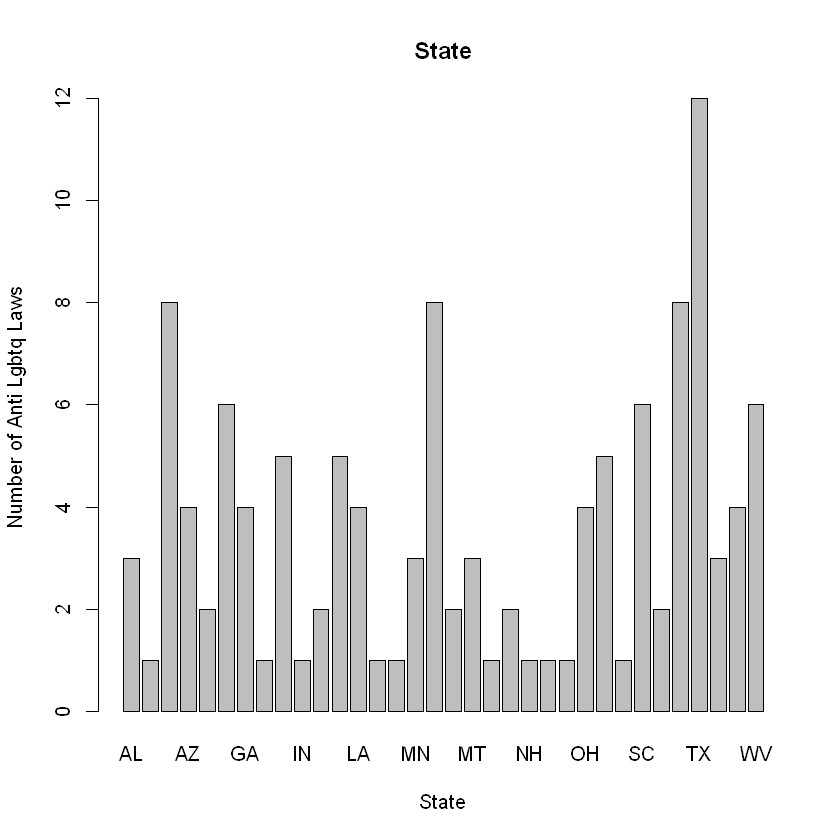

In [18]:
counts <- table(antiLgbtq$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Anti Lgbtq Laws')

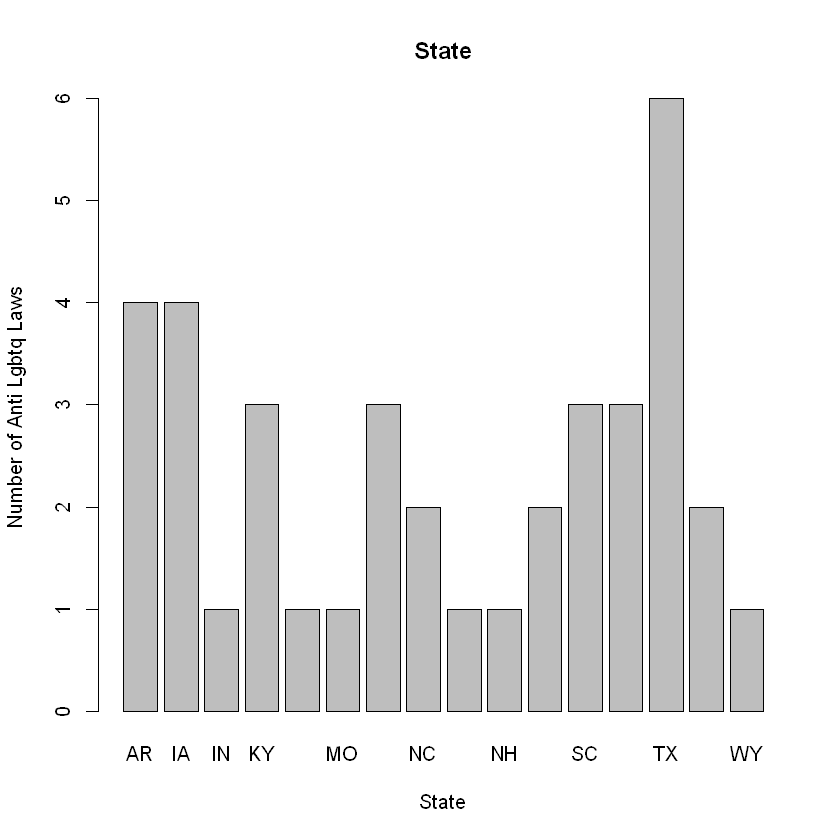

In [24]:
counts <- table(religiousExemption$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Religous Exemption Laws')

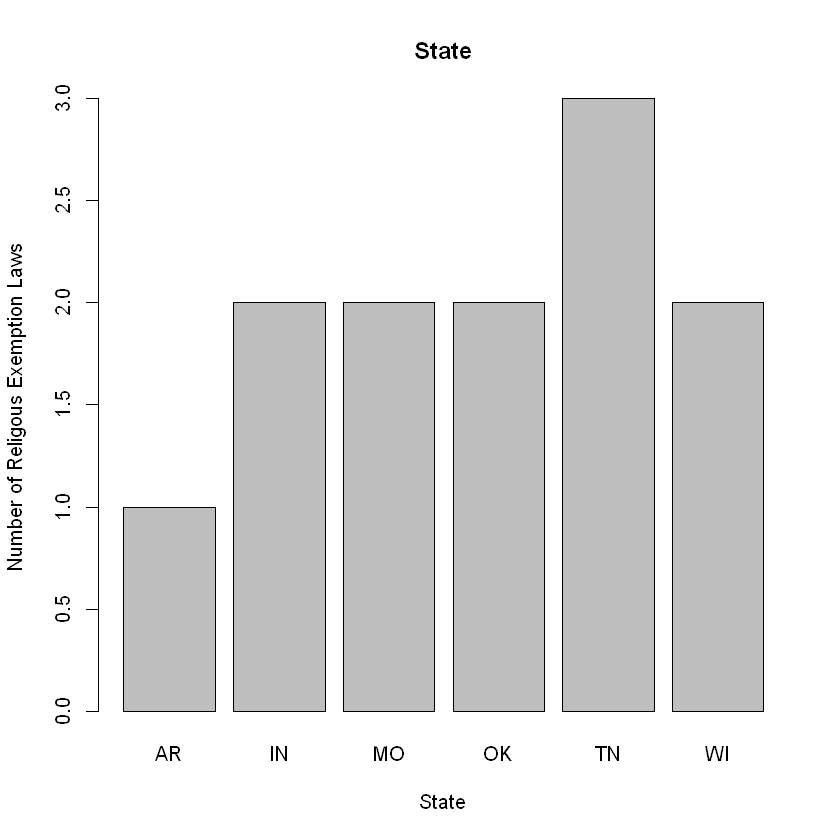

In [25]:
counts <- table(preemptingProtection$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Religous Exemption Laws')

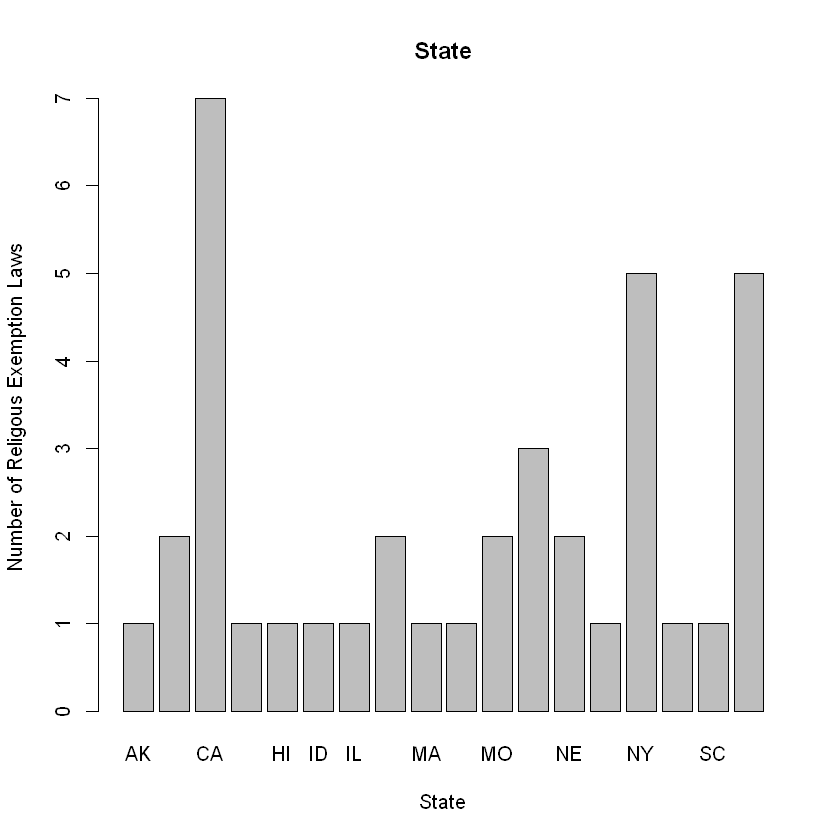

In [27]:
counts <- table(lgbtqEquality$State)
barplot(counts, main='State', xlab = 'State', ylab='Number of Religous Exemption Laws')